In [180]:
import os
import matplotlib.pyplot as plt
# import cvxpy as cp
import cvxportfolio as cvx
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

In [181]:
cvx.forecast.HistoricalFactorizedCovariance()

HistoricalFactorizedCovariance(half_life=inf, rolling=inf, kelly=True)

In [182]:
prices = [[100]*10]
corr = np.array([[1., 0.19525643, 0.39917748, -0.39418553, -0.00707647, -0.67112039, 0.01641167, 0.51935931, 0.01156094, -0.12535449],
                    [0.19525643, 1., -0.07321996, -0.21788827, -0.18569623, 0.13150835, -0.60040443, -0.53314565, 0.05302451, -0.26636013],
                    [0.39917748, -0.07321996, 1., -0.15891728, 0.67221197, -0.31235951, 0.53347361, -0.0530431, -0.76791062, -0.45707164],
                    [-0.39418553, -0.21788827, -0.15891728, 1., 0.3489336, 0.35257993, 0.45167662, 0.08117293, 0.09709185, -0.37131356],
                    [-0.00707647, -0.18569623, 0.67221197, 0.3489336, 1., -0.26214982, 0.60173726, 0.02792043, -0.51561155, -0.570016],
                    [-0.67112039, 0.13150835, -0.31235951, 0.35257993, -0.26214982, 1., -0.19752891, -0.61942314, -0.12761225, -0.20618394],
                    [0.01641167, -0.60040443, 0.53347361, 0.45167662, 0.60173726, -0.19752891, 1., 0.3605392, -0.22767222, -0.13848597],
                    [0.51935931, -0.53314565, -0.0530431, 0.08117293, 0.02792043, -0.61942314, 0.3605392, 1., 0.4291785, 0.29031668],
                    [0.01156094, 0.05302451, -0.76791062, 0.09709185, -0.51561155, -0.12761225, -0.22767222, 0.4291785, 1., 0.5735452],
                    [-0.12535449, -0.26636013, -0.45707164, -0.37131356, -0.570016, -0.20618394, -0.13848597, 0.29031668, 0.5735452, 1.]])
mu = np.array([0.09070628, 0.08425672, 0.05552159, 0.06445937, 0.06549034,
     0.06249785, 0.07575028, 0.07677769, 0.0678443, 0.06768946])
chol = np.linalg.cholesky(corr)
for i in range(132):
    
    bm = np.random.normal(0, 2, 10)

    prices_temp = mu + bm @ chol
    
    prices.append((prices_temp + prices[-1]).tolist())

# returns = (np.array(returns[1:]) - np.array(returns[:-1]))/np.array(returns[:-1])
returns = ((np.array(prices[1:]) - np.array(prices[:-1]))/np.array(prices[:-1])).T.tolist()
returns.append(np.random.uniform(0.0015, 0.0025, 132))
returns = np.array(returns)
returns = returns.T
prices = np.array(prices)
volumes = prices*10000000

In [183]:
ret = pd.DataFrame(returns)

datetime_list = []

for i in range(2012,2023):
    for j in range(1,13):
        datetime_list.append(datetime.datetime(i, j, 1))

ret.index = datetime_list

new_column_names = ['Stock ' + str(i + 1) for i in range(len(ret.columns) - 1)] + ['USDOLLAR']
ret.columns = new_column_names


price = pd.DataFrame(prices)
volume = pd.DataFrame(volumes)

datetime_list.insert(0, datetime.datetime(2011, 12, 1))
price.index = datetime_list
volume.index = datetime_list

new_column_names = ['Stock ' + str(i + 1) for i in range(len(ret.columns) - 1)]
price.columns = new_column_names
volume.columns = new_column_names

In [184]:
ret


,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,Stock 10,USDOLLAR
2012-01-01,0.009694,0.000260,-0.072357,-0.024692,0.001612,-0.017794,0.008077,0.018975,0.017135,0.000681,0.001648
2012-02-01,-0.029016,0.000663,0.004517,0.042139,-0.002430,0.004907,0.014600,0.001810,0.005388,0.000676,0.002204
2012-03-01,-0.034437,-0.007496,-0.029353,-0.012521,-0.015680,0.017300,-0.000187,-0.007854,0.008246,0.000674,0.002444
2012-04-01,0.059931,0.008653,-0.028319,-0.035330,0.008760,-0.014548,0.009833,0.011764,0.010370,0.000678,0.002330
2012-05-01,-0.017344,0.022506,0.023235,0.013457,-0.017339,0.003908,0.004484,-0.012035,-0.003298,0.000673,0.002393
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.001477,0.029482,-0.005828,-0.061213,-0.011080,0.018653,-0.030466,-0.001741,-0.014791,0.000624,0.002221
2022-09-01,0.021958,0.001874,0.004408,0.012194,-0.002743,-0.018628,0.018424,0.017399,0.009891,0.000629,0.001786
2022-10-01,-0.013785,-0.010334,0.048586,0.006112,-0.017071,-0.005870,0.001755,-0.000038,0.000650,0.000624,0.001784
2022-11-01,0.016899,-0.020281,0.099878,0.011557,0.015495,0.004988,-0.006058,-0.004021,-0.011319,0.000621,0.001970


In [185]:
prices_real = pd.read_csv("prices_real.csv")
returns_real = pd.read_csv("returns_real.csv")
volumes_real = pd.read_csv("volumes_real.csv")

prices_real.loc[:, 'Date'] = pd.to_datetime(prices_real['Date'])
returns_real.loc[:, 'Date'] = pd.to_datetime(returns_real['Date'])
volumes_real.loc[:, 'Date'] = pd.to_datetime(volumes_real['Date'])

prices_real = prices_real.set_index('Date')
returns_real = returns_real.set_index('Date')
volumes_real = volumes_real.set_index('Date')

returns_real = returns_real.rename(columns={'FEDFUNDS': 'USDOLLAR'})
returns_real.drop('ABNB', axis=1, inplace=True)
returns_real.drop('UBER', axis=1, inplace=True)
returns_real = returns_real.dropna()

prices_real.drop('ABNB', axis=1, inplace=True)
prices_real.drop('UBER', axis=1, inplace=True)
prices_real = prices_real.dropna()

volumes_real.drop('ABNB', axis=1, inplace=True)
volumes_real.drop('UBER', axis=1, inplace=True)
volumes_real = volumes_real.dropna()

In [186]:
returns_real

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA,USDOLLAR
Date,,,,,,,,
2010-11-19,0.003959,0.015326,0.018423,0.001432,0.002047,-0.009605,0.032282,0.000008
2010-11-22,0.033794,0.000000,-0.006874,-0.005837,-0.005254,0.000660,0.000727,0.000008
2010-11-23,-0.012853,-0.024151,-0.024044,-0.020372,-0.024354,-0.013887,-0.023256,0.000008
2010-11-24,0.053805,0.006961,0.027622,0.014434,0.006917,0.020514,0.024554,0.000008
2010-11-26,-0.000282,-0.003840,-0.012350,-0.010612,0.009558,-0.008353,-0.012346,0.000008
...,...,...,...,...,...,...,...,...
2024-03-13,0.006671,0.019567,-0.005457,0.013167,0.026779,0.008237,-0.011152,0.000206
2024-03-14,0.012404,-0.010309,0.010300,0.011762,-0.021858,0.025360,-0.032392,0.000206
2024-03-15,-0.024224,0.001362,-0.003684,-0.000963,0.033266,-0.015034,-0.001217,0.000206


In [187]:
# Historical Data

# Initialize stock market simulator
simulator = cvx.MarketSimulator(returns = returns_real, volumes = volumes_real, prices = prices_real)

# Create objective function and constraints to the optimization problem

constraints = []
gamma_trade = 2.5
gamma_hold = 2.5

def make_policy(gamma_trade, gamma_risk, constraints):
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
                                       - gamma_trade * cvx.StocksTransactionCost()
                                       - gamma_hold * cvx.StocksHoldingCost() - cvx.FullCovariance(),
                                          constraints, planning_horizon=12)

policy = make_policy(1, 1, constraints)

# objective = cvx.ReturnsForecast()
#             - gamma_trade * cvx.StocksTransactionCost() - gamma_hold * cvx.StocksHoldingCost()
#             - cvx.FullCovariance()

# Initialize policy
# policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=12)

# backtest
results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2022-01-01', end_time='2023-01-01')


# MULTI-PERIOD OPTIMIZATION


###########################################################
Universe size                                             8
Initial timestamp                       2022-01-03 00:00:00
Final timestamp                         2022-12-30 00:00:00
Number of periods                                       251
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            3.288e+05
Profit (USDOLLAR)                                -6.712e+05
                                                           
Avg. return (annualized)                             -68.0%
Volatility (annualized)                               94.0%
Avg. excess return (annualized)                      -69.7%
Avg. active return (annualized)                      -69.7%
Excess volatility (annualized)                        94.0%
Active volatility (annualized)                        94.0%
                                                           
Avg. grow

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


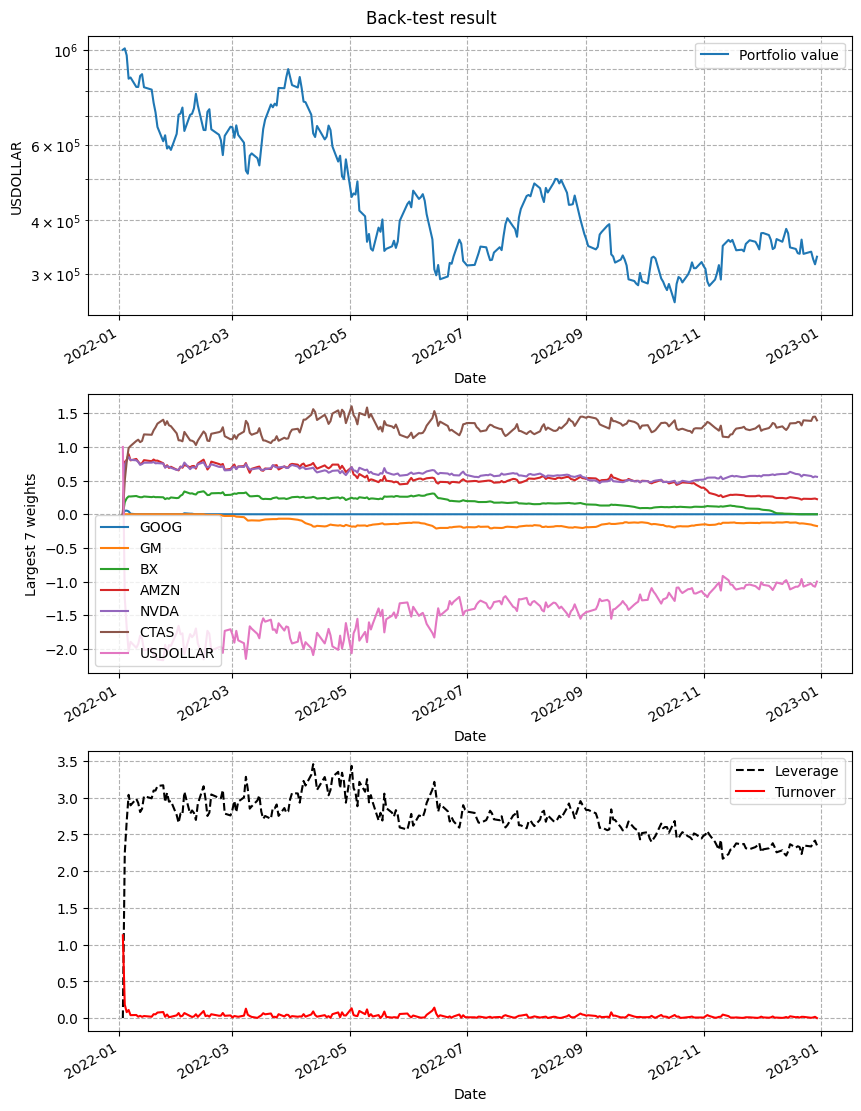

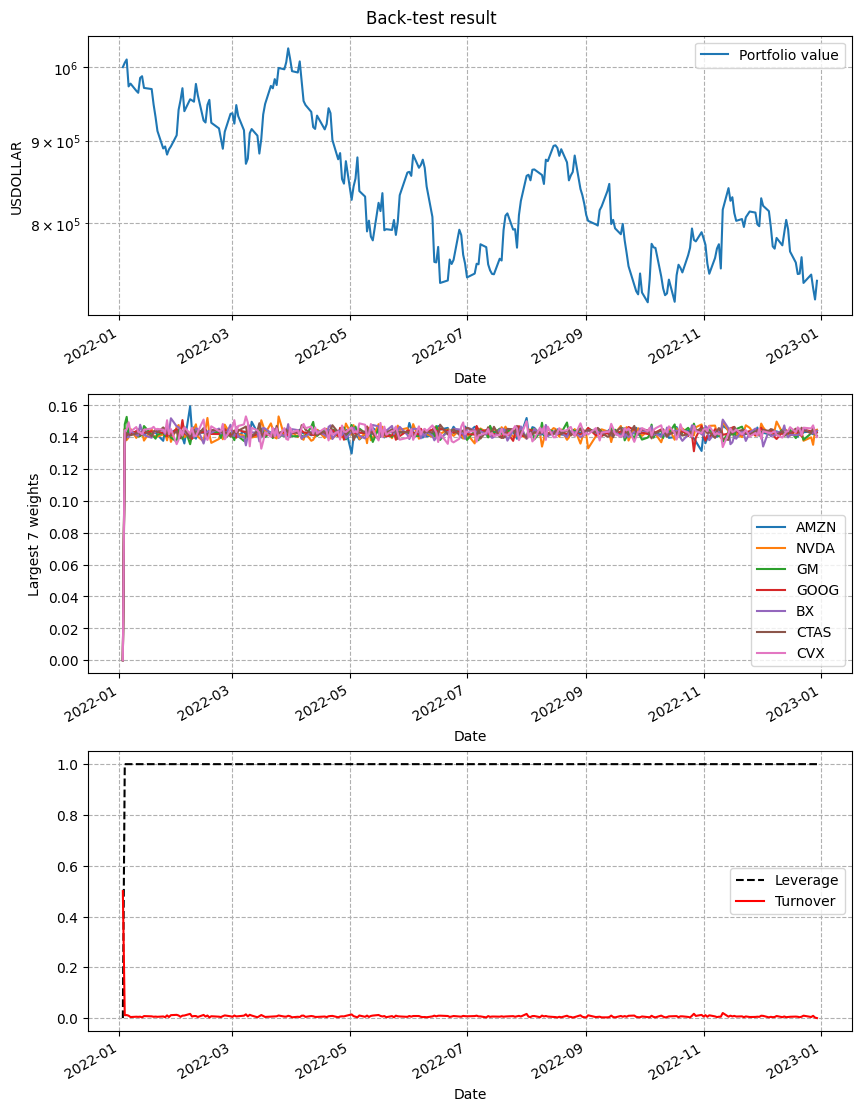

In [188]:
# print multi-period result
print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results[0])

# print uniform allocation result
print("\n# UNIFORM ALLOCATION:\n")
print(results[1])

# plot value and weights of the portfolio in time for MPO
mpo_figure = results[0].plot()

# plot value and weights of the portfolio in time for uniform
uniform_figure = results[1].plot()

In [189]:
stocks = returns_real.columns

In [190]:
returns_real

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA,USDOLLAR
Date,,,,,,,,
2010-11-19,0.003959,0.015326,0.018423,0.001432,0.002047,-0.009605,0.032282,0.000008
2010-11-22,0.033794,0.000000,-0.006874,-0.005837,-0.005254,0.000660,0.000727,0.000008
2010-11-23,-0.012853,-0.024151,-0.024044,-0.020372,-0.024354,-0.013887,-0.023256,0.000008
2010-11-24,0.053805,0.006961,0.027622,0.014434,0.006917,0.020514,0.024554,0.000008
2010-11-26,-0.000282,-0.003840,-0.012350,-0.010612,0.009558,-0.008353,-0.012346,0.000008
...,...,...,...,...,...,...,...,...
2024-03-13,0.006671,0.019567,-0.005457,0.013167,0.026779,0.008237,-0.011152,0.000206
2024-03-14,0.012404,-0.010309,0.010300,0.011762,-0.021858,0.025360,-0.032392,0.000206
2024-03-15,-0.024224,0.001362,-0.003684,-0.000963,0.033266,-0.015034,-0.001217,0.000206


In [191]:
returns_prev = returns_real[returns_real.index < pd.Timestamp('2022-01-01')]

In [192]:
stocks_only = returns_prev[['AMZN', 'BX', 'CTAS', 'CVX', 'GM', 'GOOG', 'NVDA']]

In [193]:
stocks_only

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA
Date,,,,,,,
2010-11-19,0.003959,0.015326,0.018423,0.001432,0.002047,-0.009605,0.032282
2010-11-22,0.033794,0.000000,-0.006874,-0.005837,-0.005254,0.000660,0.000727
2010-11-23,-0.012853,-0.024151,-0.024044,-0.020372,-0.024354,-0.013887,-0.023256
2010-11-24,0.053805,0.006961,0.027622,0.014434,0.006917,0.020514,0.024554
2010-11-26,-0.000282,-0.003840,-0.012350,-0.010612,0.009558,-0.008353,-0.012346
...,...,...,...,...,...,...,...
2021-12-27,-0.008178,0.000741,0.016276,0.020445,0.009137,0.006263,0.044029
2021-12-28,0.005844,-0.027535,0.004569,-0.001936,-0.005572,-0.010914,-0.020133
2021-12-29,-0.008555,-0.021845,0.001891,-0.005145,0.002101,0.000386,-0.010586


In [194]:
stockmat = stocks_only.to_numpy()

In [195]:
stockmat = stockmat.T

In [196]:
stockmat.shape

(7, 2798)

In [197]:
x = np.mean(stockmat, axis=1)

In [198]:
print(len(x))

7


In [199]:
x

array([0.00126623, 0.00124728, 0.00117963, 0.00042879, 0.00050765,
       0.00094285, 0.00198801])

In [200]:
cor = np.corrcoef(stockmat)

In [201]:
cor

array([[1.        , 0.3742974 , 0.34789841, 0.2510634 , 0.25331859,
        0.57231879, 0.42240437],
       [0.3742974 , 1.        , 0.54001745, 0.48746126, 0.48239659,
        0.45817559, 0.41536308],
       [0.34789841, 0.54001745, 1.        , 0.53897124, 0.4892707 ,
        0.46256176, 0.41345949],
       [0.2510634 , 0.48746126, 0.53897124, 1.        , 0.5331984 ,
        0.40043175, 0.33331098],
       [0.25331859, 0.48239659, 0.4892707 , 0.5331984 , 1.        ,
        0.38183081, 0.3459676 ],
       [0.57231879, 0.45817559, 0.46256176, 0.40043175, 0.38183081,
        1.        , 0.47481837],
       [0.42240437, 0.41536308, 0.41345949, 0.33331098, 0.3459676 ,
        0.47481837, 1.        ]])

In [202]:
var_bx = np.var(stockmat[1])

In [203]:
var_bx

0.0004270918694946297

In [204]:
returns_2 = returns_real[returns_real.index >= pd.Timestamp('2022-01-01')]

In [205]:
stocks_2 = returns_2[['AMZN', 'BX', 'CTAS', 'CVX', 'GM', 'GOOG', 'NVDA']]

In [206]:
stockmat2 = stocks_2.to_numpy()

In [207]:
stockmat2.shape

(555, 7)

In [208]:
stockmat2 = stockmat2.T

In [209]:
bx2 = stockmat2[1]

In [210]:
var_bx2 = np.var(bx2)

In [211]:
var_bx2

0.0007585181430069078

In [213]:
m = var_bx2 / var_bx